# Plotting workspace comparing the effect of consensus/non-consensus in estimation and motion for our distributed algorithm.

In [1]:
%matplotlib inline
import numpy as np
from matplotlib import pyplot as plt
from matplotlib import animation, rc

from matplotlib import style
from matplotlib.lines import Line2D

import pickle as pkl

plt.rcParams['font.size'] = '16'


In [2]:

        
def plot_pq(p_trial,q_trial,axis):
        trajectory(p_trial,axis)
        axis.scatter(q_trial[0,0],q_trial[0,1],marker = '*',s=200,edgecolor='r',facecolor='w')

def plot_trial_grid(p,q):
    
    trials = np.random.choice(np.arange(len(p)),size=3*3,replace=False)

    fig, axs = plt.subplots(3, 3,sharex='all',sharey='all',dpi=200)
    axs = axs.flatten()
    for i,trial in enumerate(trials):
        plot_pq(p[trial],q[trial],axs[i])
    fig.tight_layout()
    return fig,axs

def plot_showcase(p,q):
    ft,axs = plot_trial_grid(p,q)
 
    fm = plt.figure(dpi=200)
    p_mean = np.mean(p,axis=0)
    q_mean = np.mean(q,axis=0)
    plot_pq(p_mean,q_mean,plt.gca())
    
    
    legend_elements = [Line2D([0], [0], marker='o', color='w', label='Sensor',
                              markerfacecolor='g', markersize=10),
                       Line2D([], [], marker='*',linestyle='None', color='r', label='Source',
                              markerfacecolor='w', markersize=10)]
    plt.legend(handles=legend_elements)
    return ft,fm

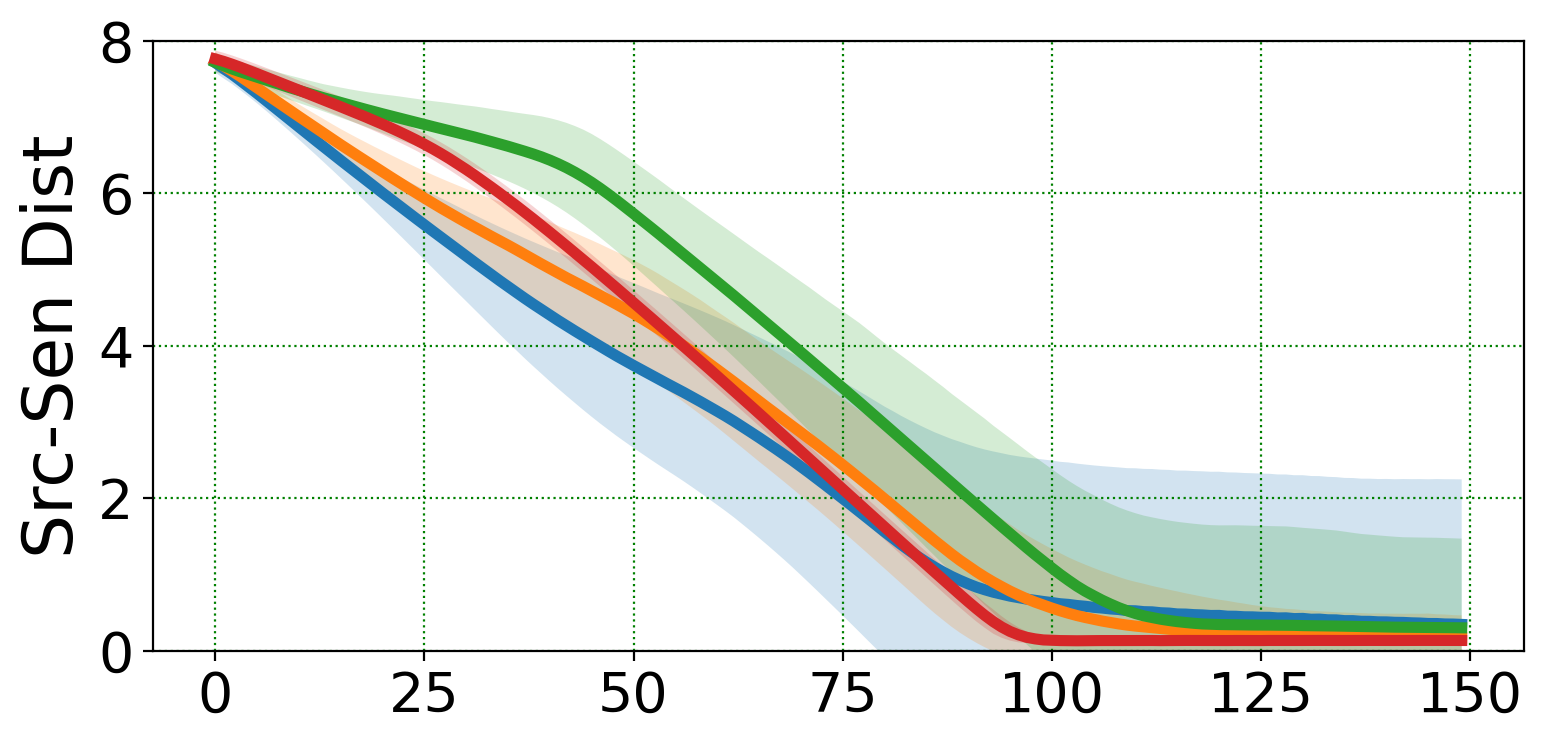

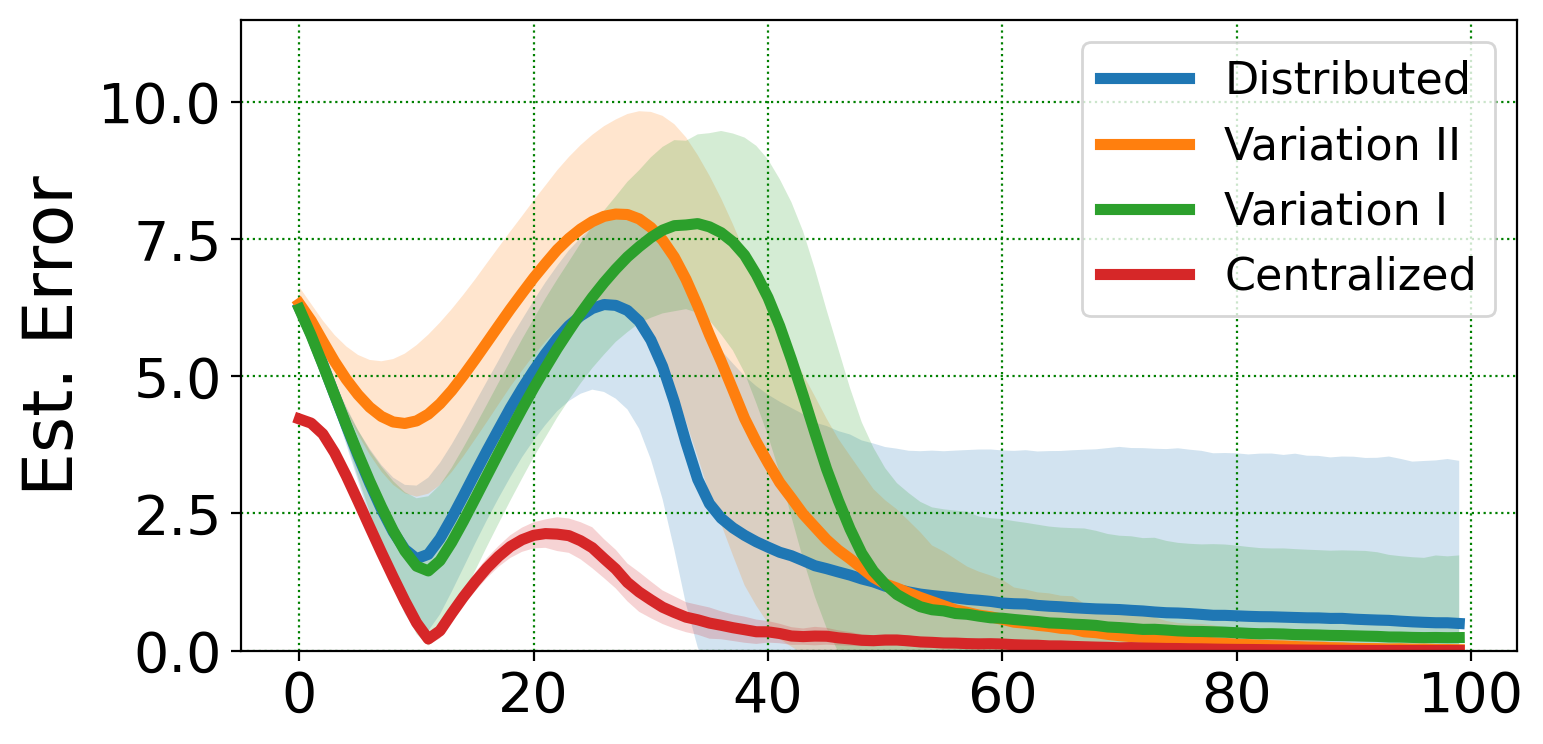

In [4]:
label_map = {'Coord.+Consensus Est.':'Distributed',
          'No Coord.+Consensus Est.':'Variation I',
           'No Coord.+Local Est.':'Variation II',
             'centralized':'Centralized'
          }
'''Plotting'''  
# for N_sen in [4,5,6,10,20,40]:

# for N_sen in [4,10,20,40]:
  
for N_sen in [10]:
    
    
    with open('../Data/CentralizedData-{}Sensor.pkl'.format(N_sen),'rb') as file:
        central_data = pkl.load(file)
    
    
    with open('../Data/Distributed-FIM-{}Sensor.pkl'.format(N_sen),'rb') as file:
        data = pkl.load(file)    
    
    
    data={**data,**central_data}
    
    q = np.array([6,6])
    
    fig0,axis0 = plt.subplots(dpi=200,figsize=(8,4))
    fig1,axis1 = plt.subplots(dpi=200,figsize =(8,4) )
    
    axes = [axis0,axis1]
  
    for name,d in data.items():
        ps = np.array(d['p'])
        qhat = np.array(d['qhat'])
         # qhat.shape=ps.shape=(N_trails,N_iter,space_dim)
        dist = np.linalg.norm(ps-q,axis=-1)
        # dist.shape = (N_trails,N_iter,N_sen)
        # print(qhat.shape,dist.shape)
        
        # if len(qhat.shape)>3:
        dist=np.median(dist,axis=-1)
        
        # print(dist.shape)
        

        ave_median_dist = np.mean(dist,axis=0)
        std_median_dist = np.std(dist,axis=0)
        N_iter=len(ave_median_dist)

        x = np.arange(N_iter)
        axes[0].plot(x,ave_median_dist,label= label_map[name],lw=4)
        axes[0].fill_between(x,ave_median_dist+std_median_dist,ave_median_dist-std_median_dist,alpha=0.2)
        # axes[0].errorbar(x,ave_median_dist,yerr=std_median_dist,label= label_map[name],errorevery=10)
        axes[0].set_ylabel('Src-Sen Dist',fontsize=25)
        # if N_sen == 4:
        #     axes[0].legend()
        axes[0].set_ylim((0,8))
        axes[0].grid(True,ls='dotted',color='g')
        axes[0].tick_params(axis='both', which='major', labelsize=20)
        axes[0].tick_params(axis='both', which='minor', labelsize=20)

        
        err = np.linalg.norm(qhat-q,axis=-1)
        
        
        if len(qhat.shape)>3:
            err=np.median(err,axis=-1)

        ave_median_err = np.mean(err,axis=0)
        std_median_err = np.std(err,axis=0)
        # print(std_median_err)
        x = np.arange(100)
        axes[1].plot(x[x],ave_median_err[x],label= label_map[name],lw=4)
        axes[1].fill_between(x,ave_median_err[x]+std_median_err[x],ave_median_err[x]-std_median_err[x],alpha=0.2)
        # axes[1].errorbar(x,ave_median_err[x],yerr=std_median_err[x],label= label_map[name],errorevery=10)
        axes[1].set_ylabel('Est. Error',fontsize=25)
        axes[1].set_ylim((0,11.5))
        axes[1].tick_params(axis='both', which='major', labelsize=20)
        axes[1].tick_params(axis='both', which='minor', labelsize=20)
        if N_sen == 10:
            axes[1].legend()

        axes[1].grid(True,ls='dotted',color='g')
    # fig.suptitle('{} Sensors'.format(N_sen))
        fig0.tight_layout()
        
        fig0.savefig('../Figures/DistCompare_{}Sensor.png'.format(N_sen))
        
        fig1.tight_layout()
        
        fig1.savefig('../Figures/EstimationCompare_{}Sensor.png'.format(N_sen))
       

# Estimations and Trajectories 

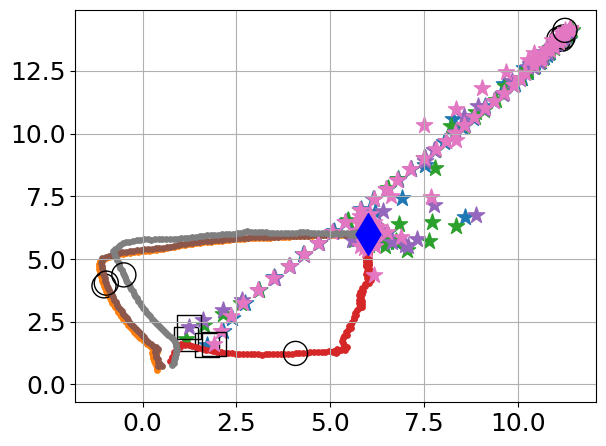

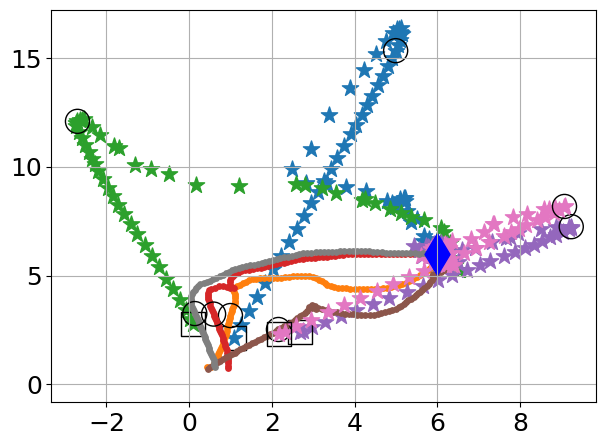

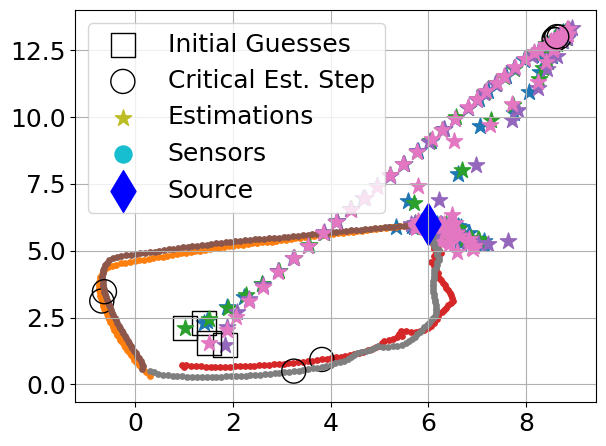

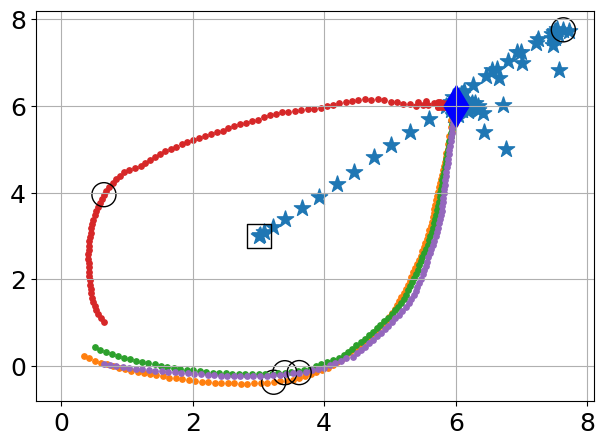

In [213]:
N_sen = 4

with open('../Data/CentralizedData-{}Sensor.pkl'.format(N_sen),'rb') as file:
    central_data = pkl.load(file)


with open('../Data/Distributed-FIM-{}Sensor.pkl'.format(N_sen),'rb') as file:
    data = pkl.load(file)    


data={**data,**central_data}

def arrows(ax,x,y):
    ax.quiver(x[:-1], y[:-1], x[1:]-x[:-1], y[1:]-y[:-1], 
                   scale_units='xy', angles='xy', scale=1
                  )


data
D = 10
s = 150
lw = 2
fontsize = 18
ind = 1

critical_t ={'Coord.+Consensus Est.':40,
          'No Coord.+Consensus Est.':30,
           'No Coord.+Local Est.':25,
             'centralized':30
          }
for name,d in data.items():
    stress_t = critical_t[name]
    ps = np.array(d['p'])
    qhat = np.array(d['qhat'])
     # qhat.shape=ps.shape=(N_trails,N_iter,space_dim)
    # dist = np.linalg.norm(ps-q,axis=-1)
    
    
    plt.rc('font',size = fontsize)
    if name == 'centralized':
        x = qhat[ind,:,0]
        y = qhat[ind,:,1]
        # arrows(plt.gca(),x,y)

        plt.scatter(qhat[ind,:,0],qhat[ind,:,1],marker = '*',s=s)
        
        plt.scatter(qhat[ind,stress_t,0],qhat[ind,stress_t,1],s=2*s,marker = 'o',edgecolor = 'black',facecolor = 'none',
                   label = 'Critical Est. Step' )
        plt.scatter(qhat[ind,0,0],qhat[ind,0,1],s=2*s,marker = 's',edgecolor = 'black',facecolor = 'none',
                      label = 'Initial Guess')
        
         
        for i in range(N_sen):
            plt.scatter(ps[ind,:,i,0],ps[ind,:,i,1],s=s/10)
            
            plt.scatter(ps[ind,stress_t,i,0],ps[ind,stress_t,i,1],s=2*s,marker = 'o',edgecolor = 'black',facecolor = 'none')
        
    else:
        
        plt.rc('font',size = fontsize)
        
        ax = plt.gca()
        for i in range(1,1+N_sen):
            x = qhat[ind,:,i-1,0]
            y = qhat[ind,:,i-1,1]
            # arrows(ax,x,y)
            
            ax.scatter(qhat[ind,:,i-1,0],qhat[ind,:,i-1,1],marker = '*',s=s)
            ax.scatter(qhat[ind,stress_t,i-1,0],qhat[ind,stress_t,i-1,1],s=2*s,marker = 'o',edgecolor = 'black',facecolor = 'none')
            
            ax.scatter(qhat[ind,0,i-1,0],qhat[ind,0,i-1,1],s=2*s,marker = 's',edgecolor = 'black',facecolor = 'none',
                      label = 'Initial Guesses' if i == 1 else None)
        
            
            ax.scatter(ps[ind,:,i-1,0],ps[ind,:,i-1,1],s= s/10)
             
            ax.scatter(ps[ind,stress_t,i-1,0],ps[ind,stress_t,i-1,1],s=2*s,marker = 'o',edgecolor = 'black',facecolor = 'none',
                       label = 'Critical Est. Step' if i == 1 else None)
            
            
            
            
    
    ax = plt.gca()
    hstar = ax.scatter(0,0,marker = '*',s=s,label = 'Estimations')
    hdot = ax.scatter(0,0,s= s,label = 'Sensors')
    
    ax.scatter(6,6,s=3*s,marker = 'd',edgecolor = 'blue',facecolor = 'blue',label='Source')
            
              
    # plt.xlim(-1,20)
    # plt.ylim(-1,20)

    
    plt.grid(True)

    # plt.title(label_map[name])
    plt.tight_layout()
    if label_map[name] == 'Variation I':
        plt.legend()
    hstar.set_visible(False)
    hdot.set_visible(False)
    
    plt.savefig('../Figures/Variation Trajectories/{}_detail.png'.format(label_map[name]))
    plt.show()

# Observing the difference between the trajectories.

In [91]:
ns = 10    
with open('../Data/Distributed-FIM-{}Sensor.pkl'.format(ns),'rb') as file:
    data = pkl.load(file)

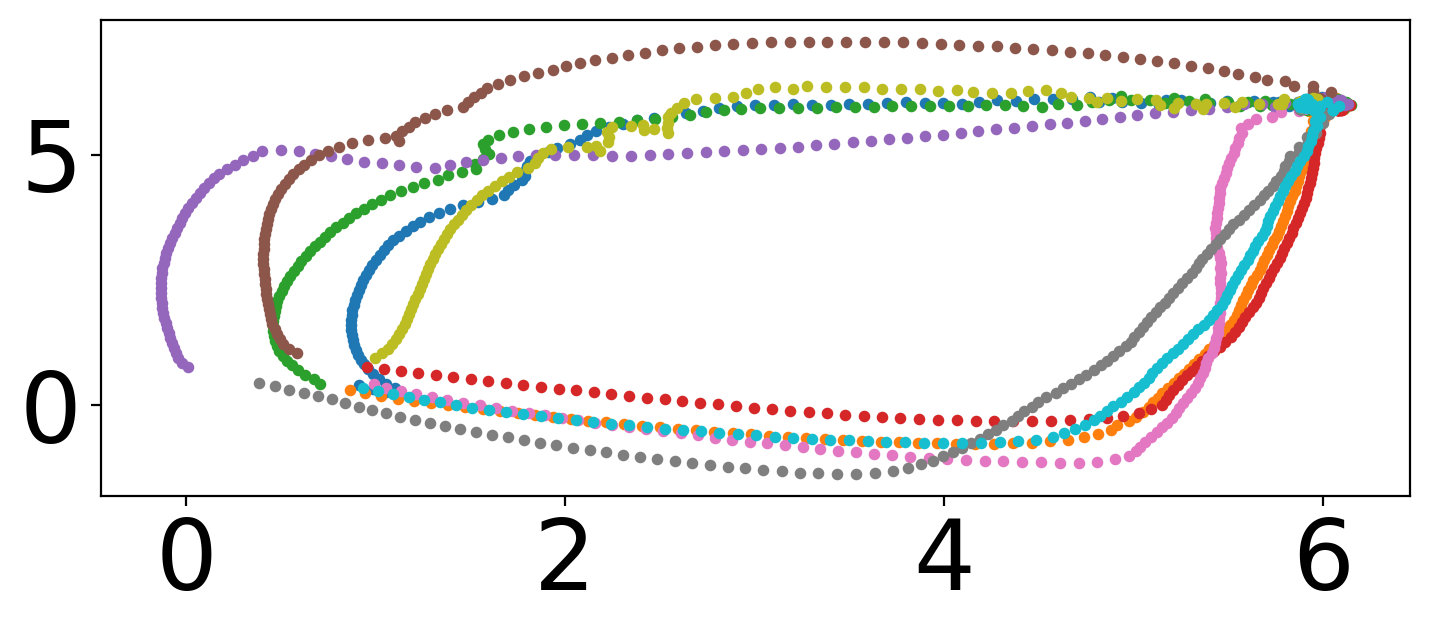

In [124]:

def trajectory(p,axis):
    N_sen = p.shape[1]
    for i in range(N_sen):
        axis.scatter(p[:,i,0],p[:,i,1],s=10)
plt.rc('font',size = 35)
np.random.seed(3413241)
fig0,axis0 = plt.subplots(dpi=200,figsize=(8,4))
    

d = data['No Coord.+Consensus Est.']
ps = np.array(d['p'])

index = np.random.randint(len(ps))

ps[index].shape

trajectory(ps[index],axis0)
# axis0.set_title('Variation I')
plt.tight_layout()
plt.savefig('../Figures/Variation Trajectories/VariationI.png')

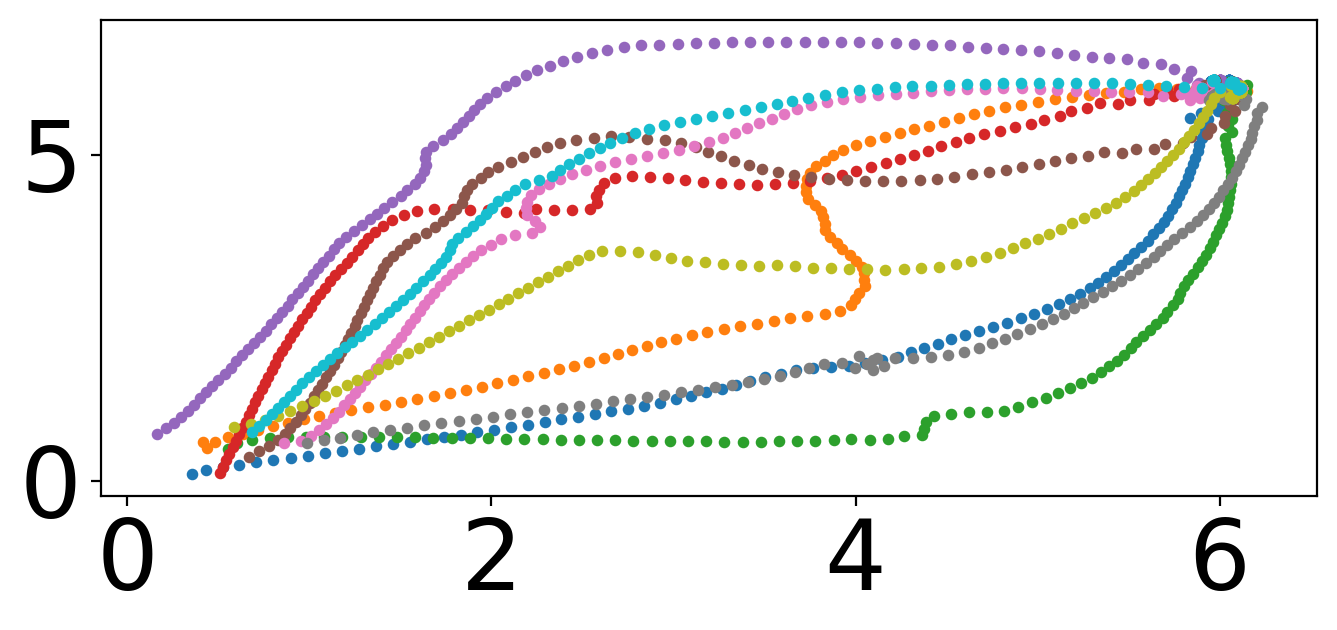

In [125]:
np.random.seed(3211)
fig0,axis0 = plt.subplots(dpi=200,figsize=(8,4))
    

d = data['No Coord.+Local Est.']
ps = np.array(d['p'])

index = np.random.randint(len(ps))

ps[index].shape

trajectory(ps[index],axis0)

plt.tight_layout()
# axis0.set_title('Variation II')
plt.savefig('../Figures/Variation Trajectories/VariationII.png')

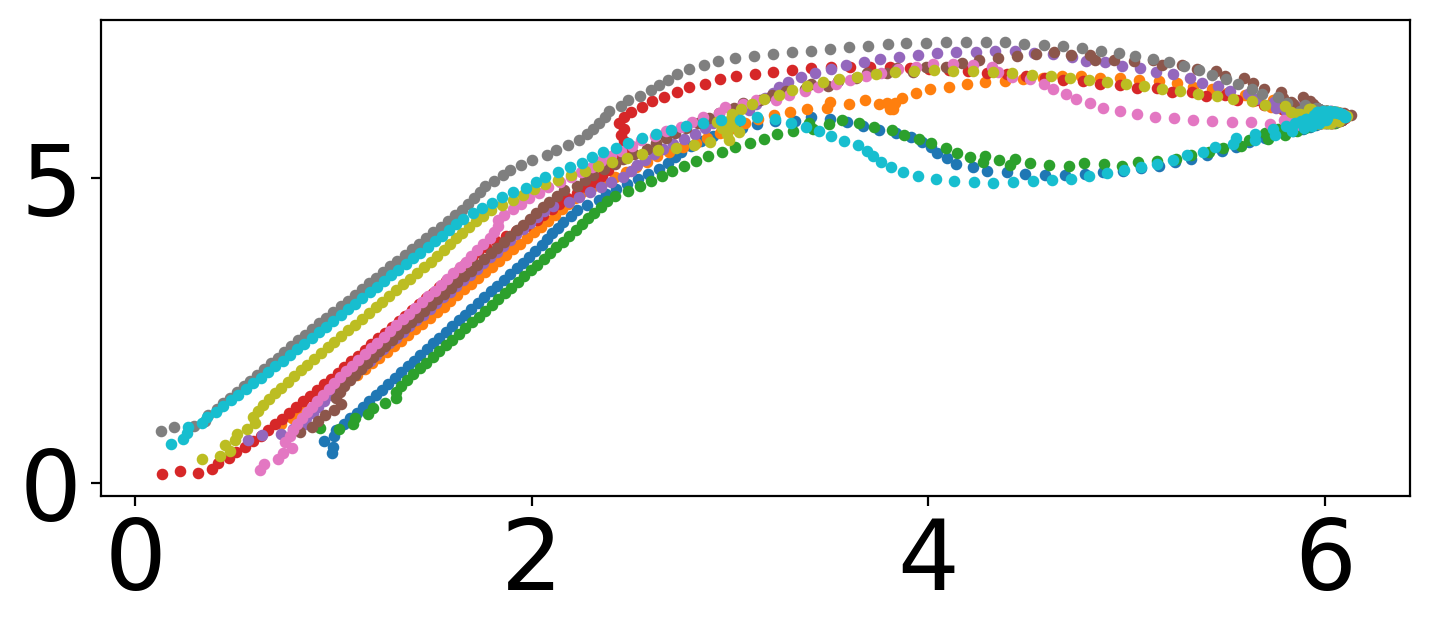

In [126]:
np.random.seed(3413241)
fig0,axis0 = plt.subplots(dpi=200,figsize=(8,4))

d = data['Coord.+Consensus Est.']
ps = np.array(d['p'])

index = np.random.randint(len(ps))

trajectory(ps[index],axis0)

plt.tight_layout()
# axis0.set_title('Our Algorithm')
plt.savefig('../Figures/Variation Trajectories/OurAlg.png')

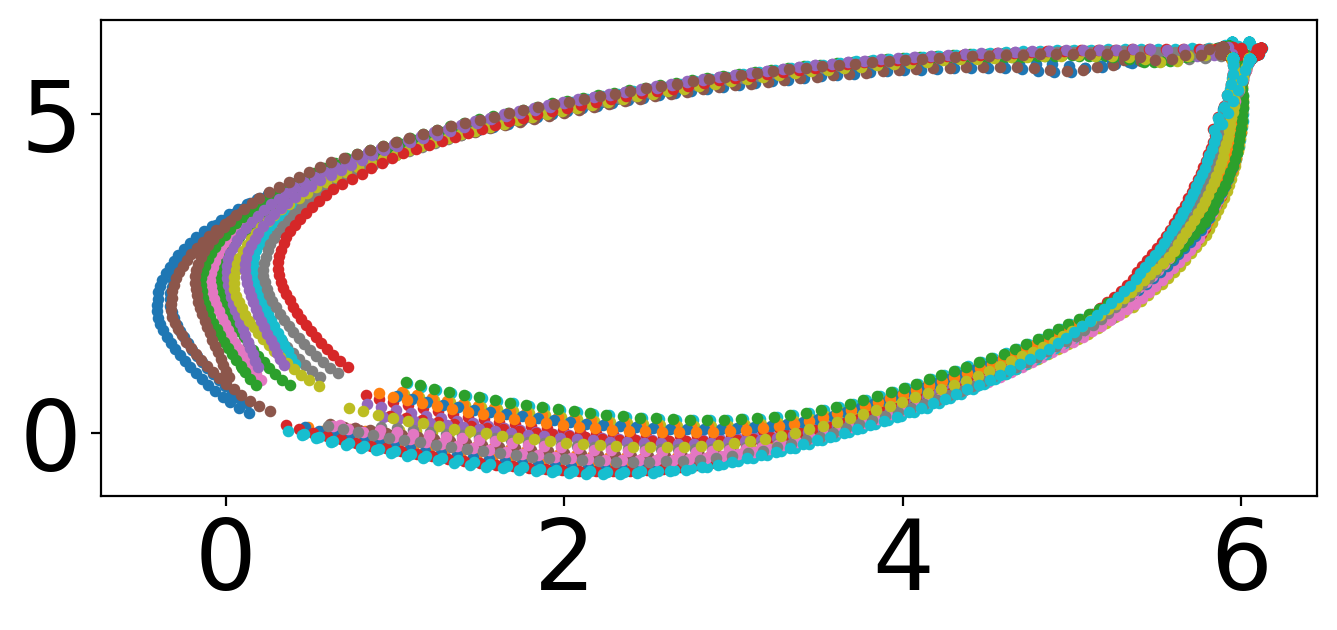

In [127]:
np.random.seed(3413241)
with open('../Data/CentralizedData-{}Sensor.pkl'.format(N_sen),'rb') as file:
    central_data = pkl.load(file)
fig0,axis0 = plt.subplots(dpi=200,figsize=(8,4))

d = central_data['centralized']
ps = np.array(d['p'])

index = np.random.randint(len(ps))

trajectory(ps[index],axis0)

plt.tight_layout()
# axis0.set_title('Centralized')
plt.savefig('../Figures/Variation Trajectories/Centralized.png')